<a href="https://colab.research.google.com/github/aasthabarnwal/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import numpy as np
import pandas as pd

from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings('ignore')
%matplotlib inline

In [118]:
df = pd.read_csv('/content/drive/MyDrive/HotelBookings.csv')

In [119]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [120]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [121]:
df.shape

(119390, 32)

#**1. Handle Missing Values**

In [122]:
df.isnull().sum().sort_values(ascending=False)

#We see there are 4 features with null values

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [123]:
#Replacing missing values
df[['company','agent','children']] = df[['company','agent','children']].fillna(0)
df['country'].fillna('Unknown', inplace = True)

In [124]:
#Now we remove all those entries where there are no guests

no_guests = list(df[(df.adults + df.babies + df.children)==0].index)

df.drop(df.index[no_guests], inplace = True)

df.shape

(119210, 32)

#**2. Checking Datatypes**

In [125]:
df.info()

#Thus are no null objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [126]:
#Converting some features from float to integers

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

#Exploratory Data Analysis

##**OVERVIEW**

#i) The home country of guests

In [127]:
#First check for actual visitors who did not cancel the booking
df_not_cancelled = df.loc[df['is_canceled'] == 0]

#get actual number of guests 
number_of_guests = df_not_cancelled['country'].value_counts()

#Creating new dataframe for country wise guests

country_wise_guests = pd.DataFrame(number_of_guests)
country_wise_guests.rename(columns={'country': 'Number of guests'}, inplace= True)
country_wise_guests["country"] = country_wise_guests.index
country_wise_guests.reset_index(drop=True, inplace=True)

#Calculate the % of guests
total_guests = country_wise_guests['Number of guests'].sum()
country_wise_guests['Percent of Bookings'] = round(country_wise_guests['Number of guests']/ total_guests * 100, 2)

In [128]:

fig = px.pie(country_wise_guests,
             values="Percent of Bookings",
             names="country",
             title = 'Home Country of Guests',
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

# ii) Bookings from top 10 countries

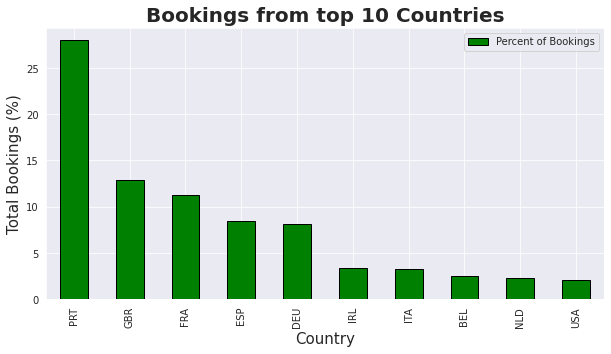

In [129]:
#Bookings from top 10 countries
top_countries = country_wise_guests[['country', 'Percent of Bookings']].head(10)
fig = top_countries.plot.bar(x = 'country', y = 'Percent of Bookings', figsize = (10,5),edgecolor = 'black', color = 'green')
fig.set_xlabel("Country", fontsize = 15)
fig.set_ylabel("Total Bookings (%)", fontsize = 15)
fig.set_title("Bookings from top 10 Countries", fontsize = 20, fontweight='bold') 
sns.set_style('darkgrid')

In [130]:
top_countries

,country,Percent of Bookings
0,PRT,27.97
1,GBR,12.89
2,FRA,11.29
3,ESP,8.51
4,DEU,8.09
5,IRL,3.39
6,ITA,3.24
7,BEL,2.49
8,NLD,2.29
9,USA,2.12


# iii) Bookings of Resort & City hotel

In [168]:
count_bookings = df_not_cancelled.groupby('hotel')['is_canceled'].value_counts()
count_bookings

hotel         is_canceled
City Hotel    0              46084
Resort Hotel  0              28927
Name: is_canceled, dtype: int64

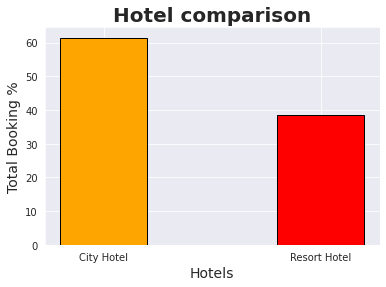

In [169]:
#Getting count of hotels (whose bookings did not cancel)
count_bookings_list = count_bookings.tolist()
percent_list = [round(n * 100/ sum(count_bookings_list), 2) for n in count_bookings_list]
hotels_list = ['City Hotel', 'Resort Hotel']

#Plotting the bar graph
plt.bar(hotels_list, percent_list, width = 0.4, edgecolor = 'black', color = ['orange','red'])
plt.xlabel("Hotels", fontsize=14)
plt.ylabel("Total Booking %", fontsize=14)
plt.title("Hotel comparison", fontsize = 20, fontweight='bold')
sns.set_style('darkgrid')
plt.show()

#iv) Showing Yearly Comparisons.



In [172]:
arrival_year = df_not_cancelled.groupby('arrival_date_year')['is_canceled'].value_counts()
arrival_year

arrival_date_year  is_canceled
2015               0              13826
2016               0              36299
2017               0              24886
Name: is_canceled, dtype: int64

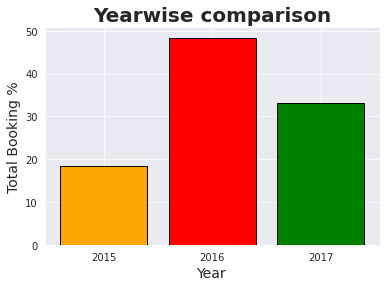

In [173]:
#Plotting yearwise guestsco
yearly_guests = arrival_year.tolist()
percent_year = [round(a * 100/ sum(yearly_guests), 2) for a in yearly_guests]
Year = ['2015', '2016', '2017']
#Checked the order of Year using value_counts in yearly_guests.
#year_ = df_not_cancelled.arrival_date_year.unique()

plt.bar(Year, percent_year, edgecolor = 'black', color = ['orange','red','green'])
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Booking %", fontsize=14)
plt.title("Yearwise comparison", fontsize = 20, fontweight='bold')
sns.set_style('darkgrid')


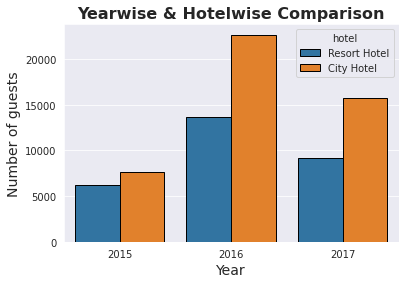

In [133]:
#Creating dataframe for year wise and hotel wise comparison
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_cancelled, edgecolor = 'black')

plt.title("Yearwise & Hotelwise Comparison", fontsize = 16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of guests", fontsize=14)
plt.show()
sns.set_style('whitegrid')

#v) Check the busiest month for hotel industry.

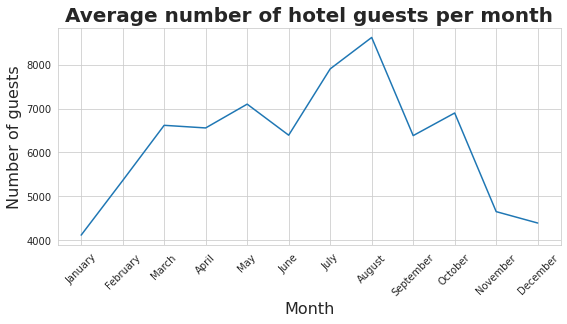

In [134]:
#Creating monthwise bookings 

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sorted_months = df_not_cancelled['arrival_date_month'].value_counts().reindex(month_order)

#Creating lineplot
plt.figure(figsize=(9,4))
sns.lineplot(month_order,sorted_months)
plt.title("Average number of hotel guests per month", fontsize = 20, fontweight='bold')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of guests", fontsize=16)
plt.xticks(rotation=45)
sns.set_style('darkgrid')
plt.show()

#vi) Getting the monthly booking trends for city and resort hotels.

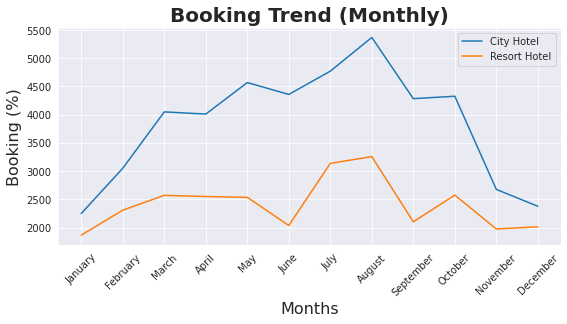

In [256]:
#Seperating monthly bookings for hotels
city_months = city_hotel['arrival_date_month'].value_counts().reindex(month_order)
resort_months = resort_hotel['arrival_date_month'].value_counts().reindex(month_order)

#Creating line plots
fig, ax = plt.subplots(figsize=(9,4))
ax.set_xlabel('Months',fontsize=16)
ax.set_ylabel('Booking (%)',fontsize=16)
ax.set_title('Booking Trend (Monthly)',fontsize = 20, fontweight='bold')

sns.lineplot(month_order, city_months, label='City Hotel', sort=False)
sns.lineplot(month_order, resort_months, label='Resort Hotel', sort=False)
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.show()

The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

#vii) How much guests pay for a room per night?

In [ ]:
#Calculating price per night only for adults & children (not babies)
resort_hotel['new_price'] = resort_hotel['adr']/(resort_hotel['adults'] + resort_hotel['children'])
city_hotel['new_price'] = city_hotel['adr']/(city_hotel['adults'] + city_hotel['children'])

In [ ]:
resort_hotel['new_price'].mean()

47.48886565607789

In [ ]:
city_hotel['new_price'].mean()

59.27298771446046

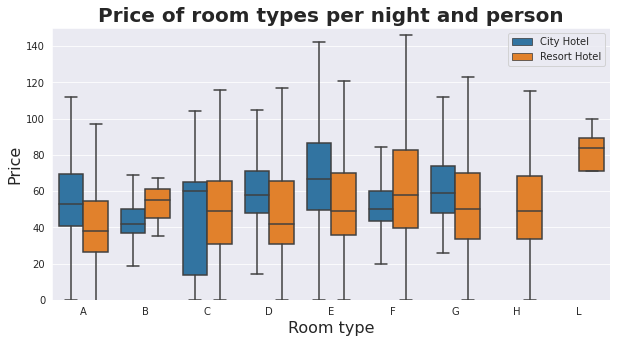

In [ ]:
#Calculating price of room types per night and person

df_not_cancelled['new_price'] = df_not_cancelled['adr']/(df_not_cancelled['adults'] + df_not_cancelled['children'])
room_prices = df_not_cancelled[["hotel", "reserved_room_type", "new_price"]].sort_values("reserved_room_type")

#Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot( x="reserved_room_type", y="new_price", hue="hotel", data = room_prices, fliersize=0)
plt.title("Price of room types per night and person", fontsize=20, fontweight = 'bold')
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.ylim(0, 150)
plt.legend(loc="upper right")
plt.show()

#viii) How the prices vary across the year?

In [ ]:
monthly_room_prices = df_not_cancelled[["hotel", "arrival_date_month", "new_price"]].sort_values("arrival_date_month")

monthly_room_prices["arrival_date_month"] = pd.Categorical(monthly_room_prices["arrival_date_month"], 
                                                           categories=month_order, ordered=True)

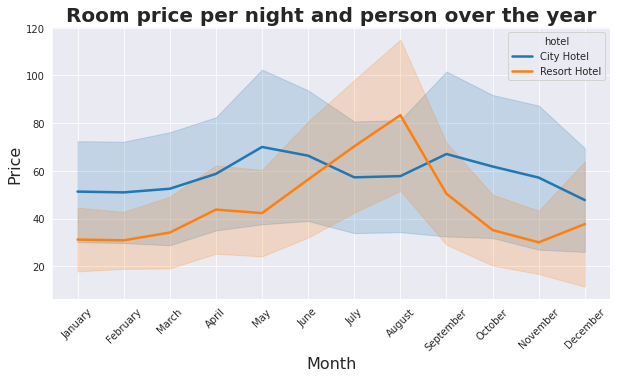

In [ ]:
#lineplot with standard deviation:
plt.figure(figsize=(10, 5))

sns.lineplot(x = "arrival_date_month", y="new_price", hue="hotel", data=monthly_room_prices, ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=20, fontweight = 'bold')
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=16)
plt.show()

#ix) What is the duration of the stay?

In [187]:
#Get total stay for hotels

resort_hotel['total_nights'] = resort_hotel['stays_in_week_nights'] + resort_hotel['stays_in_weekend_nights']
list_resort_nights = list(resort_hotel['total_nights'].value_counts().index)
resort_bookings = list(resort_hotel['total_nights'].value_counts())

city_hotel['total_nights'] = city_hotel['stays_in_week_nights'] + city_hotel['stays_in_weekend_nights']
list_city_nights = list(city_hotel['total_nights'].value_counts().index)
city_bookings = list(city_hotel['total_nights'].value_counts())

#Create relevant dataframe
resort_nights = pd.DataFrame({"hotel": "Resort hotel", "number_of_nights": list_resort_nights, "bookings": resort_bookings})
city_nights = pd.DataFrame({"hotel": "City hotel","number_of_nights": list_city_nights, "bookings": city_bookings})

#Joining the dataframes
night_stay_data = pd.concat([resort_nights, city_nights], ignore_index=True)
night_stay_data

,hotel,number_of_nights,bookings
0,Resort hotel,1,6579
1,Resort hotel,2,4488
2,Resort hotel,7,4434
3,Resort hotel,3,3828
4,Resort hotel,4,3321
...,...,...,...
57,City hotel,18,1
58,City hotel,20,1
59,City hotel,34,1
60,City hotel,21,1


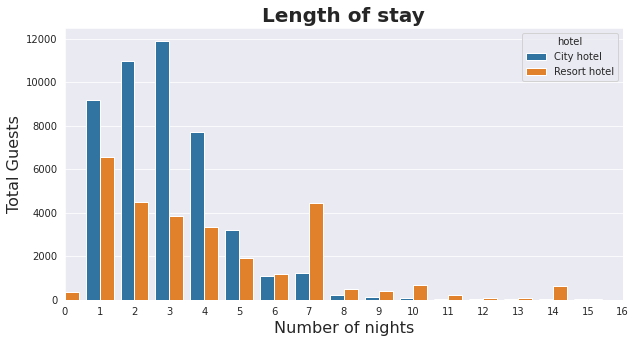

In [ ]:
#show figure:
plt.figure(figsize=(10, 5))
sns.barplot(x = "number_of_nights", y = "bookings", hue="hotel", data=night_stay_data, hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=20, fontweight = 'bold')
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Total Guests", fontsize=16)
plt.xlim(0,16)
sns.set_style('whitegrid')
plt.show()

#x) Accomodation type preferred by the guests: Single, Couple or Family (more than 2).

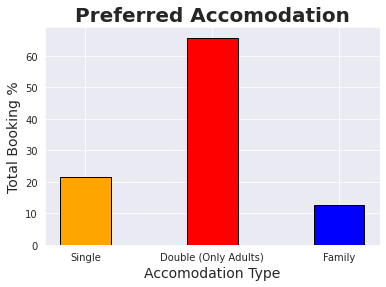

<Figure size 576x360 with 0 Axes>

In [185]:
single   = df_not_cancelled[(df_not_cancelled.adults==1) & (df_not_cancelled.children==0) & (df_not_cancelled.babies==0)]
                                                                                                
double   = df_not_cancelled[(df_not_cancelled.adults==2) & (df_not_cancelled.children==0) & (df_not_cancelled.babies==0)]

family = df_not_cancelled[(df_not_cancelled.adults + df_not_cancelled.children + df_not_cancelled.babies > 2)]

accomodation = ['Single', 'Double (Only Adults)', 'Family' ]
guest_count = [single.shape[0], double.shape[0], family.shape[0]]
guest_count_percent = [(x* 100)/sum(guest_count) for x in guest_count]

#Plotting the bar graph
plt.bar(accomodation, guest_count_percent, width = 0.4, edgecolor = 'black', color = ['orange','red','blue'])
plt.xlabel("Accomodation Type", fontsize=14)
plt.ylabel("Total Booking %", fontsize=14)
plt.title("Preferred Accomodation", fontsize = 20, fontweight='bold')
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
plt.show()

#xi) Finding the cancellation rate.

In [176]:
cancel = df['is_canceled'].value_counts()
cancel

0    75011
1    44199
Name: is_canceled, dtype: int64

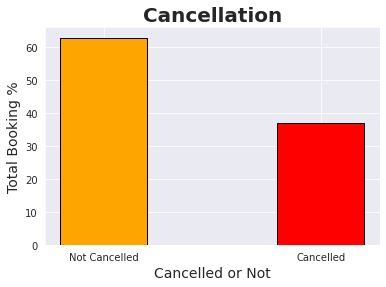

<Figure size 576x360 with 0 Axes>

In [220]:
cancel_list = cancel.tolist()
cancel_percent = [x*100/sum(cancel) for x in cancel]
cancel_col = ['Not Cancelled', 'Cancelled']

plt.bar(cancel_col, cancel_percent, width = 0.4, edgecolor = 'black', color = ['orange','red'])
plt.xlabel("Cancelled or Not", fontsize=14)
plt.ylabel("Total Booking %", fontsize=14)
plt.title("Cancellation", fontsize = 20, fontweight='bold')
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
plt.show()

In [181]:
cancel_percent

[62.9234124653972, 37.0765875346028]

#xii) Market Segment wise bookings.

In [223]:
market_wise = df_not_cancelled.groupby("hotel")["market_segment"].value_counts()
market_wise

hotel         market_segment
City Hotel    Online TA         24192
              Offline TA/TO      9546
              Direct             5016
              Groups             4339
              Corporate          2337
              Complementary       471
              Aviation            183
Resort Hotel  Online TA         11481
              Offline TA/TO      6334
              Direct             5632
              Groups             3358
              Corporate          1954
              Complementary       168
Name: market_segment, dtype: int64

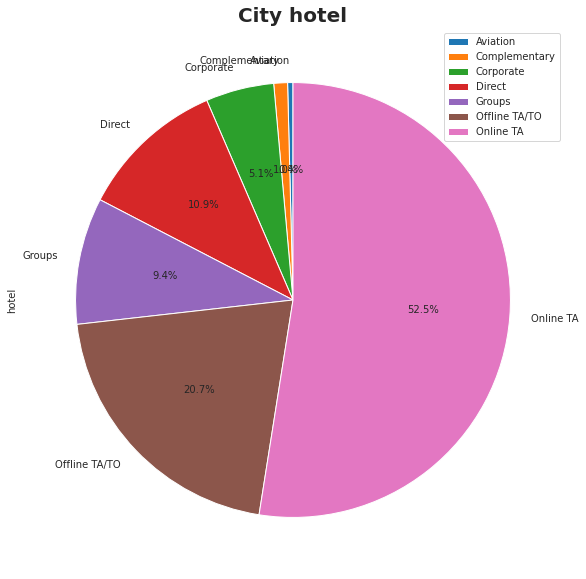

In [253]:
#Market Segment bookings for city hotel
city_hotel_market = city_hotel.groupby("market_segment").count()
city_hotel_market.plot(kind='pie', y = "hotel",autopct='%1.1f%%',startangle=90,figsize=(10,10))
plt.title("City hotel",fontsize=20, fontweight = 'bold')
plt.legend(loc="upper right")

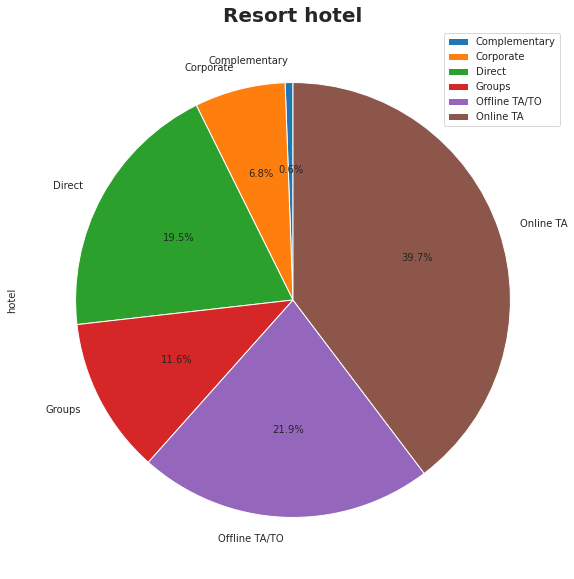

In [254]:
#Market Segment bookings for Resort hotel
resort_hotel_market = resort_hotel.groupby("market_segment").count()
resort_hotel_market.plot(kind='pie', y = "hotel",autopct='%1.1f%%',startangle=90,figsize=(10,10))
plt.title("Resort hotel",fontsize=20, fontweight = 'bold')
plt.legend(loc="upper right")

#Correlation and Heat Map

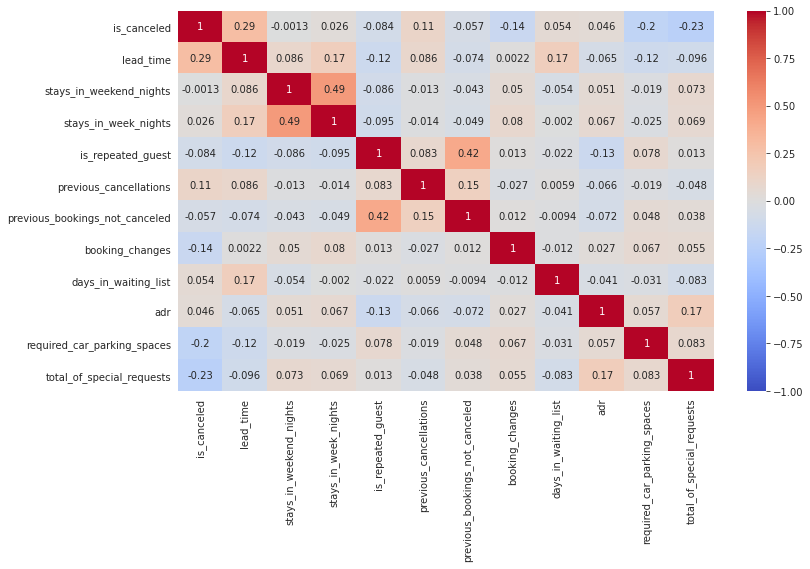

In [273]:
df_corr = df[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                    'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]
plt.figure(figsize=(12,7))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)